In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
boston = load_boston()
target = boston.target
boston.keys()
data = boston.data
target = boston.target
feature_names = boston.feature_names


In [5]:
x = pd.DataFrame(data, columns = feature_names)
print(x.shape)
y = pd.DataFrame(target, columns = ['price'])
print(y.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

(506, 13)
(506, 1)


In [6]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [31]:
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred1': y_pred1.flatten()}, columns = ['y_test', 'y_pred1'])
check_test.head(20)

,y_test,y_pred1
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"error metrics for 1st prediction (mse, mae, r2)):", mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred1)
print (mae)
from sklearn.metrics import r2_score
r2_1 = r2_score(y_test, y_pred1)
print (r2_1)

error metrics for 1st prediction (mse, mae, r2)): 9.334548946165196
3.1627098714573783
0.711226005748496



Задание 2

In [39]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=1000)
regr.fit(x_train, y_train.values[:,0])
y_pred2 = regr.predict(x_test)
check_test2 = pd.DataFrame({'y_test': y_test['price'], 'y_pred2': y_pred2.flatten()}, columns = ['y_test', 'y_pred2'])
check_test2.head(20)
r2_2 = r2_score(y_test, y_pred2)
print (r2_2)
check_test_compared = pd.DataFrame({'y_test': y_test['price'], 'y_pred1': y_pred1.flatten(), 'rsquared-1': r2_1, 
                                    'y_pred2': y_pred2.flatten(), 'rsquared-2': r2_2}, 
                                   columns = ['y_test', 'y_pred1', 'rsquared-1', 'y_pred2', 'rsquared-2'])
check_test_compared.head(20)

0.87472606157312


,y_test,y_pred1,rsquared-1,y_pred2,rsquared-2
173,23.6,28.648960,0.711226,22.806412,0.874726
274,32.4,36.495014,0.711226,31.131464,0.874726
491,13.6,15.411193,0.711226,16.339125,0.874726
72,22.8,25.403213,0.711226,23.810726,0.874726
452,16.1,18.855280,0.711226,17.139521,0.874726
76,20.0,23.146689,0.711226,21.832284,0.874726
316,17.8,17.392124,0.711226,19.895747,0.874726
140,14.0,14.078599,0.711226,14.754118,0.874726
471,19.6,23.036927,0.711226,21.240835,0.874726
500,16.8,20.599433,0.711226,20.898658,0.874726


<function matplotlib.pyplot.show(close=None, block=None)>

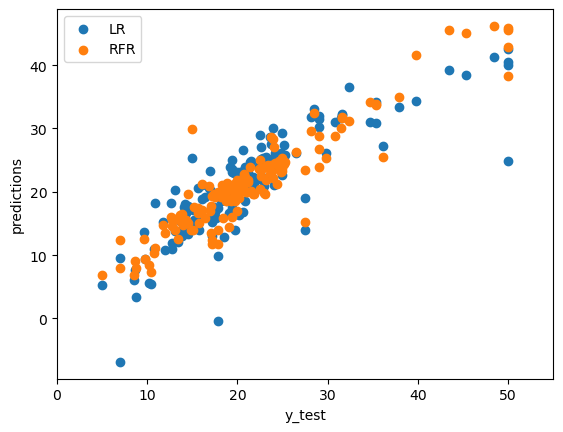

In [45]:
plt.scatter(y_test, y_pred1)
plt.scatter(y_test, y_pred2)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.legend(['LR', 'RFR'])
plt.xlim(0,55)
plt.show

Судя по r2 (что несколько подтверждает визуальное сравнение колонок), в данном случае лучше работает вторая модель. Вроде бы, ее точки кучнее.